# Classifying White Blood Cells

# Code

In [1]:
import numpy as np
#import h5py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt
#from PIL import Image

Using TensorFlow backend.


In [2]:
# epochs = 20
epochs = 20
BASE_DIR = '../'
batch_size = 32

In [3]:
#model = Sequential()

#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu', input_shape = (28,28,1)))
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x * 1./255., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding Dropouts
    model.add(Dropout(0.05))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding Dropouts
    model.add(Dropout(0.05))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding Dropouts
    model.add(Dropout(0.05))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    # Define the optimizer
#     optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#     model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

    model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

    return model

In [4]:
model = get_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

In [7]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL', 'EOSINOPHIL']:
                label = 'POLYNUCLEAR'
            else:
                label = 'MONONUCLEAR'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                #img_file = Image.open(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    size = 120,160,3
                    #img_file = img_file.resize(size, Image.NEAREST)
                    img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [8]:
X_train, y_train = get_data(BASE_DIR + 'images/TRAIN/')
X_test, y_test = get_data(BASE_DIR + 'images/TEST_SIMPLE/')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

/Users/tneupaney/.local/share/virtualenvs/wbc-classification-improved-YzUcWDem/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


In [9]:
model = get_model()

# fits the model on batches
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

model.save_weights('binary_model.h5')

Instructions for updating:
Use tf.cast instead.
Train on 7965 samples, validate on 1992 samples
Epoch 1/20
7965/7965 [==============================] - 159s 20ms/step - loss: 0.6792 - acc: 0.6236 - val_loss: 0.9760 - val_acc: 0.0000e+00
Epoch 2/20
7965/7965 [==============================] - 158s 20ms/step - loss: 0.6601 - acc: 0.6310 - val_loss: 0.8509 - val_acc: 0.0487
Epoch 3/20
7965/7965 [==============================] - 161s 20ms/step - loss: 0.5499 - acc: 0.7266 - val_loss: 0.4841 - val_acc: 0.8092
Epoch 4/20
7965/7965 [==============================] - 163s 20ms/step - loss: 0.4175 - acc: 0.8493 - val_loss: 0.3161 - val_acc: 0.8986
Epoch 5/20
7965/7965 [==============================] - 164s 21ms/step - loss: 0.2942 - acc: 0.8973 - val_loss: 0.3408 - val_acc: 0.8318
Epoch 6/20
7965/7965 [==============================] - 168s 21ms/step - loss: 0.2267 - acc: 0.9155 - val_loss: 0.1181 - val_acc: 0.9654
Epoch 7/20
7965/7965 [==============================] - 165s 21ms/step - loss:

In [37]:
model.save('final.model')

# Learning Curve

In [10]:
#def plot_learning_curve(history):
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./accuracy_curve.png')
plt.clf()
#plot_learning_curve(history)

<Figure size 432x288 with 0 Axes>

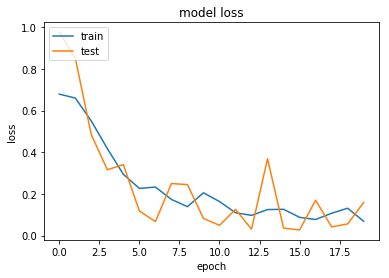

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./loss_curve.png')

# Accuracy

In [23]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = model.predict(X_test).round()
#y_pred = np.print(model.predict(X_test))

#print(y_pred)
print(accuracy_score(y_test, y_pred))

Predicting on test data
0.9859154929577465


# Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 9  1]
 [ 0 61]]


# Images Misclassified

In [25]:
false_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 0))

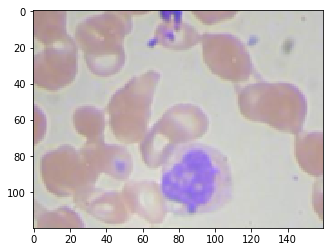

In [26]:
img = X_test[false_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Mononuclear Cells Classified Correctly

In [27]:
true_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 1))

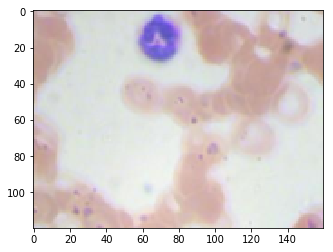

In [28]:
img = X_test[true_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

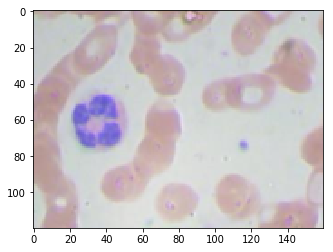

In [29]:
img = X_test[true_positive_mononuclear[5]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

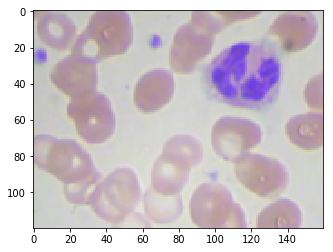

In [30]:
img = X_test[true_positive_mononuclear[8]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Polynuclear Cells Classified Correctly

In [31]:
true_positive_polynuclear = np.intersect1d(np.where(y_pred == 0), np.where(y_test == 0))

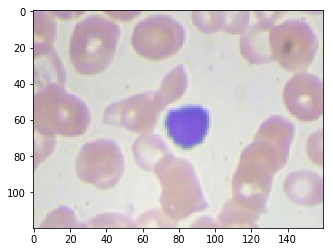

In [32]:
img = X_test[true_positive_polynuclear[8]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

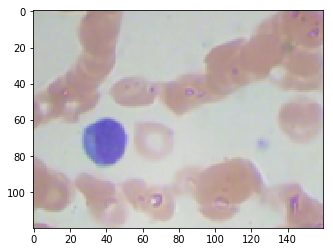

In [33]:
img = X_test[true_positive_polynuclear[4]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

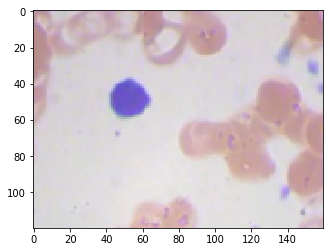

In [34]:
img = X_test[true_positive_polynuclear[3]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [61]:
CATEGORIES = ["POLYNUCLEAR","MONONUCLEAR"]
import tensorflow as tf

def prepare(filename):
    img_file = "../images/TEST_EXTERNAL/"+filename
    sizeX = 120
    sizeY = 160
    img_file = cv2.imread(img_file)
    img_arr = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
    #return img_arr.reshape(-1,sizeX,sizeY,3)
    return img_arr.reshape(-1, 120,160,3)

In [67]:
trainedModel = tf.keras.models.load_model("final.model")
prediction = model.predict([prepare('002.jpg')])
print(CATEGORIES[int(prediction[0][0])])

POLYNUCLEAR


/Users/tneupaney/.local/share/virtualenvs/wbc-classification-improved-YzUcWDem/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':
